## Polynomial Regression-Overfitting-Underfitting

Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modelled in the nth degree polynomial.

Types of polinomials

$1^{st} degree --> linear:$    $b_{1}*x + b_{0}$

$2^{nd} degree --> Quadratic:$ $b_{2}*x^2 + b_{1}*x + b_{0}$

$3^{rd} degree --> Cubic:$     $b_{3}*x^3 + b_{2}*x^2 + b_{1}*x + b_{0}$

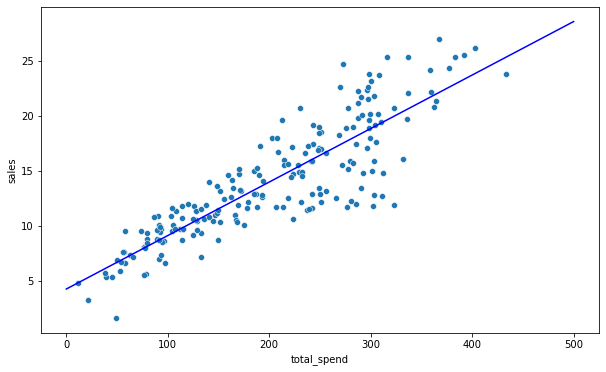
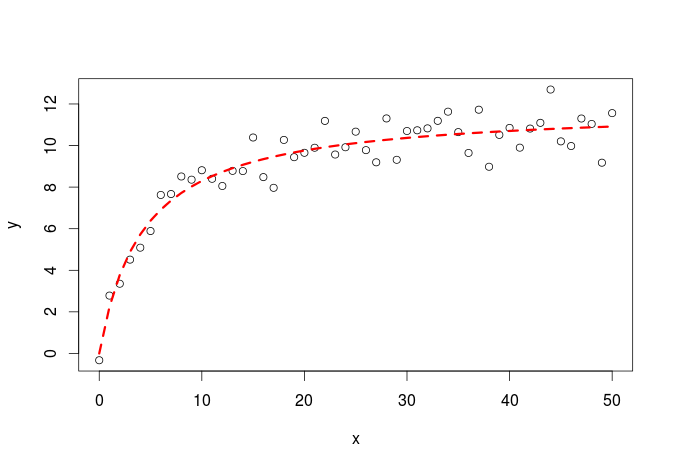
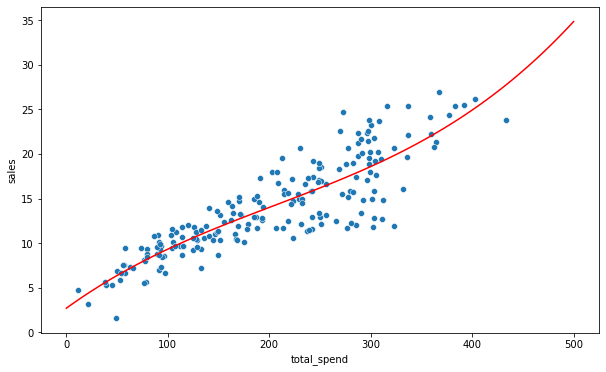

## Import libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# We will derive polynomial features from the features we have at hand
# using the PolynomialFeatures class.

In [64]:
data = np.array([[2, 3, 4]])
print(data)

# Let's see this with a small example.
# We will see how the polynomial features are derived.

[[2 3 4]]


In [65]:
trans = PolynomialFeatures(degree=2, include_bias=False)

# Type in the degree you want to transform your features to.
# We set inclue_bias parameter to be false because, in linear regression,
# we already have a bias (intercept) value so we don't need another one.

### y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + β₁₁x₁² + β₂₂x₂² + β₃₃x₃² + β₁₂x₁x₂ + β₁₃x₁x₃ + β₂₃x₂x₃

In [66]:
trans.fit(data)

# 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2 --> 2nd degree transformation is done like this

# In scikit-learn API, the fit method is used whenever we learn parameters about the data.
# No actual transformation is done here. Only learning.

PolynomialFeatures(include_bias=False)

In [67]:
# poly degree=3
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

# 3rd degree transformation is done like this

In [68]:
trans.transform(data)

# Using the parameters that was learnt using the fit method, we now transform the data.
# In scikit-learn API, the transform method is used whenever we want to generate a new view
# of the data.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [69]:
trans.fit_transform(data)

# We can also invoke the fit_transform method to do those 2 steps at once.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [70]:
df = pd.read_csv("Advertising.csv")

In [71]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [72]:
X = df.drop("sales", axis=1)
y = df.sales

In [73]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)


### y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + β₁₁x₁² + β₂₂x₂² + β₃₃x₃² + β₁₂x₁x₂ + β₁₃x₁x₃ + β₂₃x₂x₃

In [74]:
polynomial_converter.fit(X)

# fit method here learns the required parameters to do a 2nd degree transformation using our dataset.

PolynomialFeatures(include_bias=False)

In [75]:
poly_features = polynomial_converter.transform(X)

# Using the parameters learnt with the fit method, we now transform the dataset using
# the transform method.

In [76]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [77]:
poly_features.shape

# We initially had 3 features. After a 3rd degree transformation, we derived 6 more features,
# totalling 9 features.

(200, 9)

In [78]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                       "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

# Naming the features accordingly to make it easier to read how they originated/were derived.

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [79]:
X.shape

(200, 3)

## Train | Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Splitting the dataset using our new dataset with 9 features.

## Model for fitting

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model_poly = LinearRegression()

In [84]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = model_poly.predict(X_test)

In [86]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare

# Notice our predictions got much better after deriving 6 more features, totalling 9 features.

,Actual,pred,residual
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970
115,12.6,12.559272,0.040728
69,22.3,22.807850,-0.507850
170,8.4,8.343714,0.056286
174,11.5,12.058602,-0.558602
45,14.9,15.690246,-0.790246


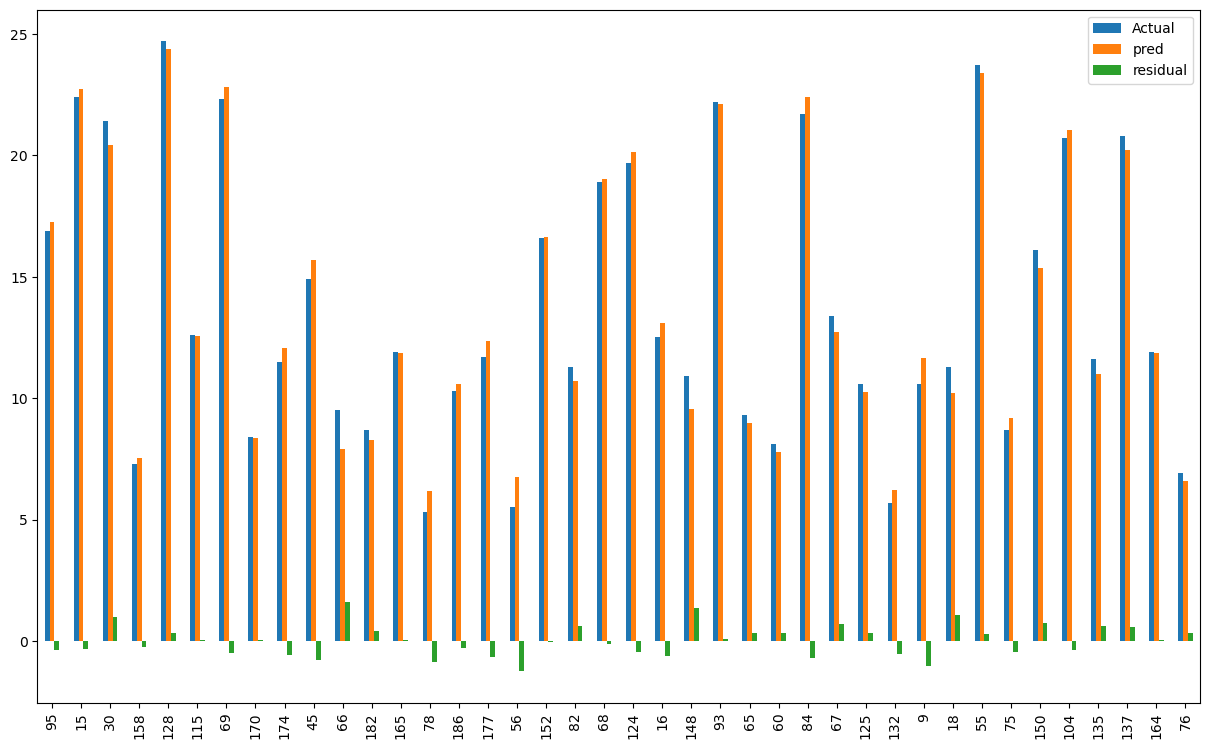

In [87]:
compare.plot(kind='bar',figsize=(15,9))
plt.show();

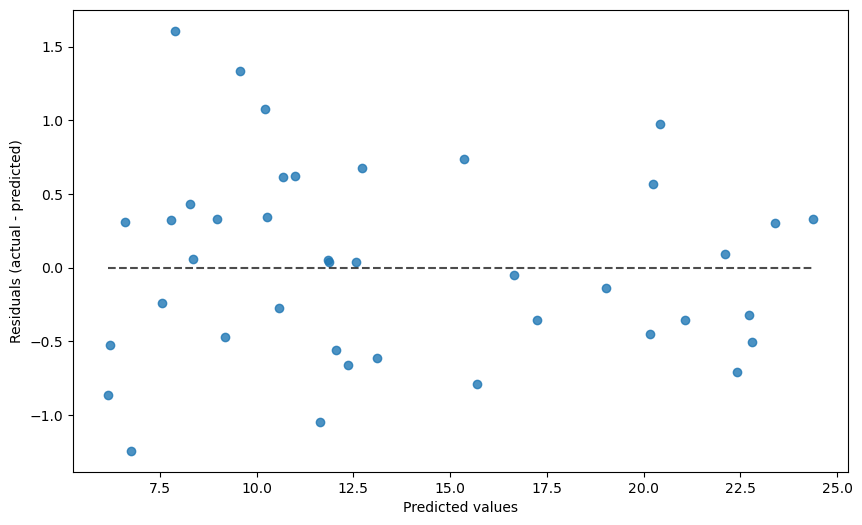

In [88]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

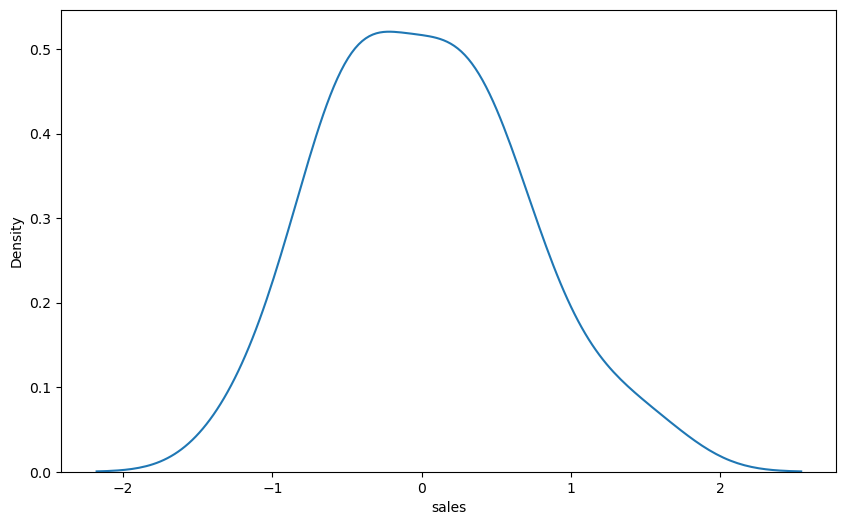

In [89]:
residuals = y_test - y_pred
sns.kdeplot(residuals)
plt.show();

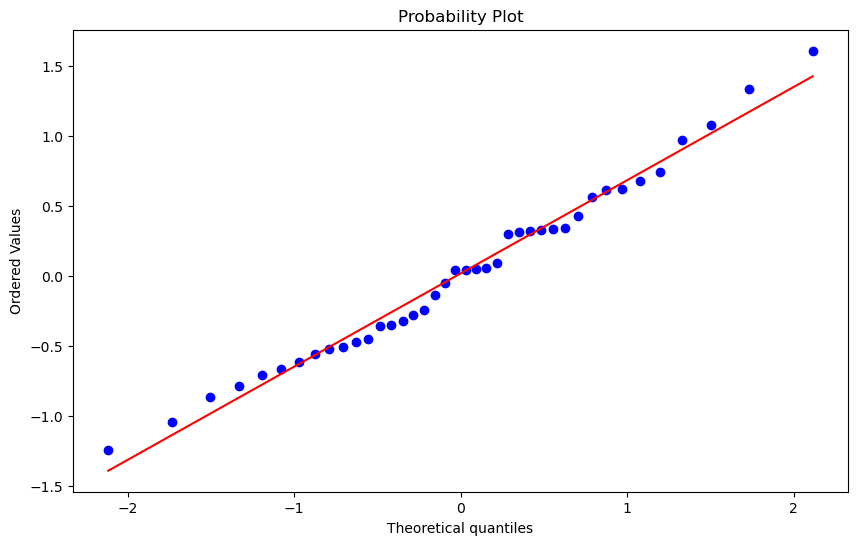

In [90]:
import scipy.stats as stats
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# If the Points Are Close to the Line:
# The residuals are in accordance with the normal distribution, it can be said that the model meets this assumption.

In [91]:
from scipy.stats import skew
skew(residuals)  # If the skewness value is close to zero, the distribution is approximately symmetric.

np.float64(0.3427326969814247)

## Poly Coefficients

In [92]:
model_poly.coef_

# Coefficients for our 9 features.

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [93]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

# To make it easier to read the coefficients, we are turning them into a dataframe with their correct names.

In [94]:
df_coef

# Since we didn't scale our dataset, the ordering here as to which columns are more/less important could be misleading.
# We have to first scale the dataset to get an objective result. We will talk more about scaling later.

,coef
TV,0.053236
radio,0.017098
newspaper,0.010581
TV^2,-0.000112
TV&Radio,0.001111
TV&Newspaper,-0.000074
Radio^2,0.000133
Radio&newspaper,0.000125
Newspaper^2,0.000028


## Evaluation on the Test Set

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score,root_mean_squared_error

In [96]:
y_pred = model_poly.predict(X_test)

# Get precitions on the X_test.

In [97]:
def eval_metric(actual, pred):
    """
    Prints out to the console MAE, MSE and RMSE of a regression model,
    given the actual and predicted values of the target.

        Parameters:
            actual: A collection of actual target values.
            pred: A collection of predicted target values.

        Returns:
            None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = root_mean_squared_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    print(f"MAPE{'':<5}: {mape}")

    return R2_score, mae, mse, rmse, mape

In [98]:
eval_metric(y_test, y_pred);

# Test set scores are always the best estimate of your model performance on how well
# the model would perform in real life. Keep it away from the model. Keep it safe :)

Model testing performance:
--------------------------
R2_score : 0.9869181490609604
MAE      : 0.5261794444043801
MSE      : 0.4129102285379017
RMSE     : 0.6425809120553626
MAPE     : 0.04893877124817153


In [99]:
y_train_pred = model_poly.predict(X_train)

# We will compare the train and test scores to examine if we are dealing with an overfitting/underfitting
# problem.

In [100]:
eval_metric(y_train, y_train_pred);

# The train and test scores are very close to each other. Hence, we can conclude that the model
# is neither overfitting nor underfitting. Good job.

Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.40897219513551714
MSE      : 0.3603966744701223
RMSE     : 0.6003304710491733
MAPE     : 0.05347009333579735


## Let's find optimal degree of poly

In [101]:
def poly(d):

    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []

    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_RMSE = mean_squared_error(y_train,train_pred)
        test_RMSE = root_mean_squared_error(y_test,test_pred)

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)

        number_of_features.append(poly_features.shape[1])

    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors,
                         "number of features":number_of_features}, index=range(1,d))


# This function tries every possible degree from 1 to d and returns train and test rmse scores for each iteration as a result.

In [102]:
poly(7)

# As the degree increases, both our train and test scores are getting better until after 4th degree.
# As of that point, train scores keep getting better whereas test scores start to get worse. This is a clear indication of overfitting.

,train_rmse_errors,test_rmse_errors,number of features
1,2.705129,1.781600,3
2,0.360397,0.642581,9
3,0.216061,0.542742,19
4,0.135728,0.786099,34
5,0.062748,8.746512,55
6,0.067406,29.089996,83


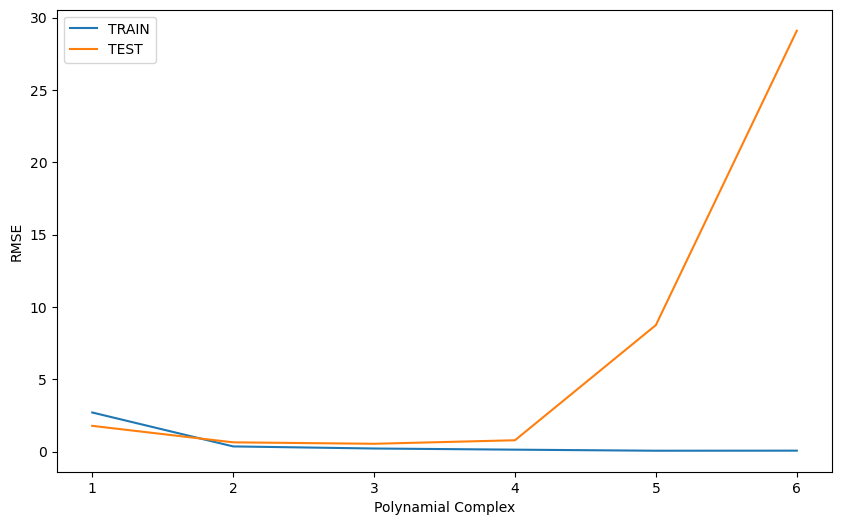

In [103]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# Let's plot the results to visualise it better. At the degree of 4, the model starts to overfit. We can therefore choose either 2 or 3
# as the optimum degree. To help the model generalise better, it's always a better idea to go for the situation in which
# fewer features are utilised if no significant accuracy gain is observed between them. Hence, we will go for the degree of 2.

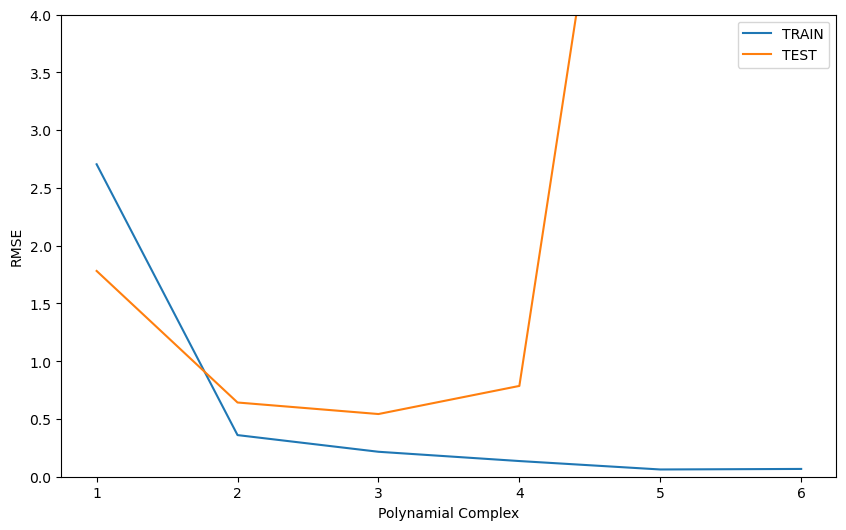

In [104]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label="TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label="TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.ylim(0,4)
plt.legend();

# Let's zoom in a little by only showing the interval [0,4] on the y-axis.

## Finalizing Model Choice

In [105]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# We are going ahead with degree=2

In [106]:
final_model = LinearRegression()

In [107]:
poly_X = final_poly_converter.fit_transform(X)

# Get the new features using polynomial features with a degree of 2.

In [108]:
final_model.fit(poly_X, y)

# train a new model with newly created features with a degree of 2.

LinearRegression()

In [109]:
poly_X.shape

(200, 9)

## Predictions

In [110]:
new_record = [[150, 20, 15]]

# Creating a new observation.

In [111]:
new_record_poly = final_poly_converter.transform(new_record)

# The same preprocessing has to be done on all of the new observation points received by the model.
# Otherwise, the model was trained on 9 features and this observation has only 3 features.
# There's a shape mismatch and the model will throw an error. Go ahead and try it if you're curious.

/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [112]:
new_record_poly.shape

# Making sure that the shape is correct. The new observation has now 9 features. All good.

(1, 9)

In [113]:
final_model.predict(new_record_poly)

array([14.17474185])

## Overfitting

In [114]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)

# Let's demonstrate an overfitting situation. We now from the previous plot that
# the model overfits at the degree of 5.

In [115]:
over_model = LinearRegression()

In [116]:
poly_features = over_poly_converter.fit_transform(X)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [118]:
over_model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred_over = over_model.predict(X_test)

In [120]:
eval_metric(y_test, y_pred_over);

Model testing performance:
--------------------------
R2_score : -1.423725278436292
MAE      : 2.107659693819346
MSE      : 76.50148005016874
RMSE     : 8.746512450695347
MAPE     : 0.17876025865246398


In [121]:
y_train_over = over_model.predict(X_train)

In [122]:
eval_metric(y_train, y_train_over);

# Notice that train scores are extremely good whereas test scores are absolutely horrible.
# Negative r2 score? How is this possible? I explained this in our lectures. Go check the documentation
# of scikit-learn on r2 score to find out more about it.

Model testing performance:
--------------------------
R2_score : 0.9975806950613997
MAE      : 0.18795752812499963
MSE      : 0.06274769771377381
RMSE     : 0.25049490556451204
MAPE     : 0.01640689978646527


## Underfitting